In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('Hz31.txt', names=['z', 'H(z)', 'error'], sep=' ')
z = np.array(data['z'])
H = np.array(data['H(z)'])
error = np.array(data['error'])

y = np.array(data[['H(z)', 'error']])


### An errorbar plot of the given data is shown

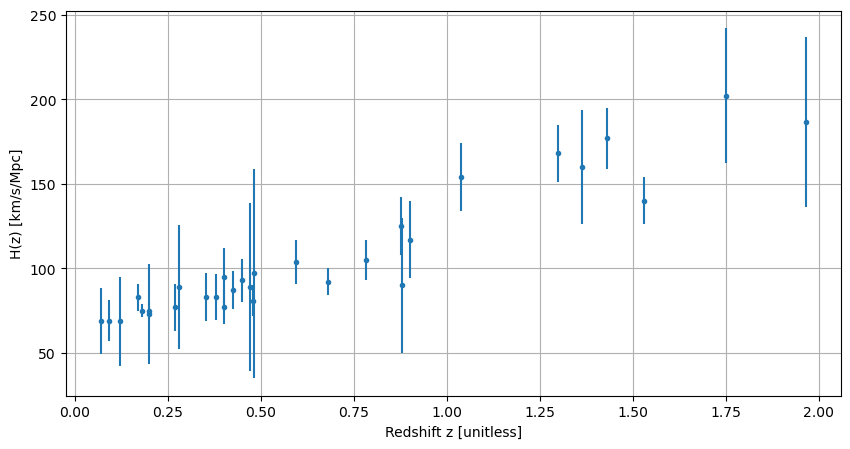

In [4]:
plt.figure(figsize=(10, 5), dpi=100)
plt.errorbar(z, H, yerr=error, fmt='.')
plt.xlabel('Redshift z [unitless]')
plt.ylabel('H(z) [km/s/Mpc]')
plt.grid()
plt.show()

### Split the dataset into training and validation sets

In [5]:
num_samples = z.shape[0]
print('Number of samples:', num_samples)

Number of samples: 31


In [6]:
n = int(0.9 * num_samples)
print('Number of training samples:', n)
print('Number of validation samples:', num_samples - n)

Number of training samples: 27
Number of validation samples: 4


In [7]:
z_train = z[:n]
y_train = y[:n]

z_validation = z[n:]
y_validation= y[n:]

### Build and train a model using the training set

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(2), 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.MeanSquaredError(),
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 


Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(z_train, y_train, epochs=1000, validation_data=(z_validation, y_validation))


Epoch 1/1000
1/1 [==============================] - 1s 614ms/step - loss: 5205.7725 - val_loss: 16367.5791
Epoch 2/1000
1/1 [==============================] - 0s 56ms/step - loss: 5204.0835 - val_loss: 16361.1699
Epoch 3/1000
1/1 [==============================] - 0s 57ms/step - loss: 5202.4053 - val_loss: 16354.7715
Epoch 4/1000
1/1 [==============================] - 0s 39ms/step - loss: 5200.7480 - val_loss: 16348.3994
Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 5199.1138 - val_loss: 16342.1279
Epoch 6/1000
1/1 [==============================] - 0s 40ms/step - loss: 5197.5073 - val_loss: 16335.9463
Epoch 7/1000
1/1 [==============================] - 0s 40ms/step - loss: 5195.9106 - val_loss: 16329.8018
Epoch 8/1000
1/1 [==============================] - 0s 39ms/step - loss: 5194.3291 - val_loss: 16323.6455
Epoch 9/1000
1/1 [==============================] - 0s 40ms/step - loss: 5192.7520 - val_loss: 16317.5029
Epoch 10/1000
1/1 [==========================

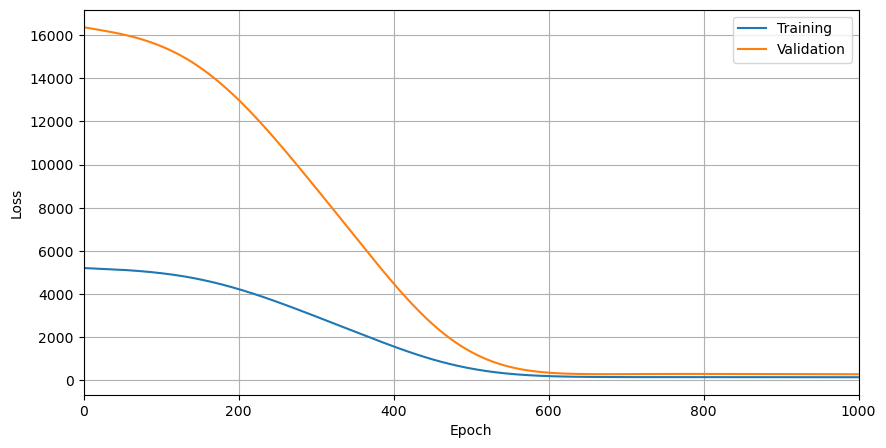

In [18]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlim(0, 1000)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [19]:
y_pred = model.predict(z)


1/1 [==============================] - 0s 42ms/step


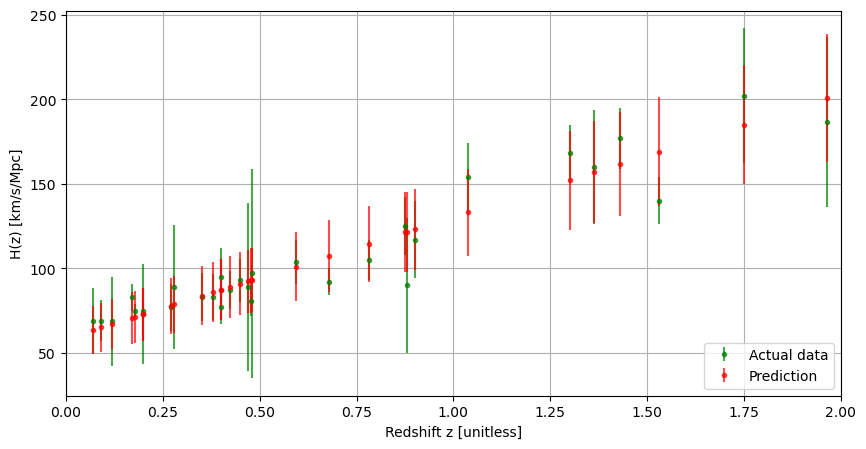

In [20]:
H_pred = y_pred[:, 0]
error_pred = y_pred[:, 1]

plt.figure(figsize=(10, 5), dpi=100)
plt.errorbar(z, H, yerr=error, fmt='.', alpha=0.7, c='green')
plt.errorbar(z, H_pred, yerr=error_pred, fmt='.', alpha=0.7, c='red')
plt.legend(['Actual data', 'Prediction'], loc='lower right')
plt.xlim(0, 2)
plt.xlabel('Redshift z [unitless]')
plt.ylabel('H(z) [km/s/Mpc]')
plt.grid()
plt.show()

7/7 [==============================] - 0s 2ms/step


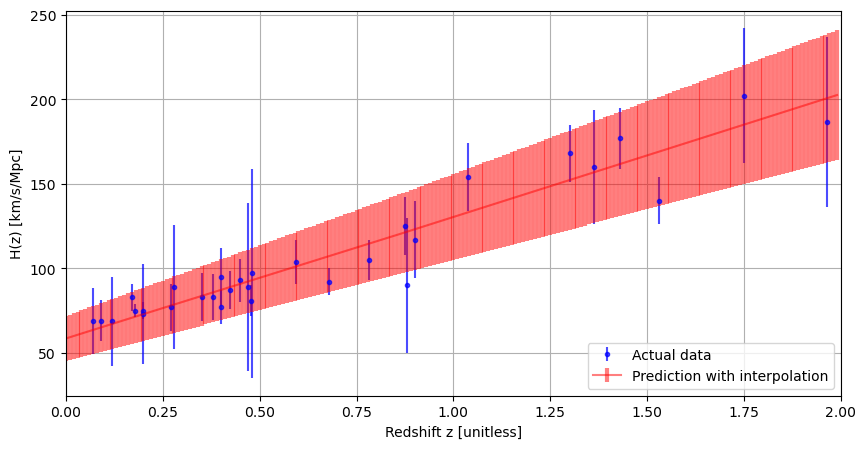

In [21]:
new_z = np.arange(0, 2, 0.01)
new_y = model.predict(new_z)
new_H = new_y[:, 0]
new_error = new_y[:, 1]

plt.figure(figsize=(10, 5), dpi=100)
plt.errorbar(z, H, yerr=error, fmt='.', alpha=0.7, c='blue')
plt.errorbar(new_z, new_H, yerr=new_error, fmt='', alpha=0.5, c='red', ecolor='red', elinewidth=3)
plt.legend(['Actual data', 'Prediction with interpolation'], loc='lower right')
plt.xlim(0, 2)
plt.xlabel('Redshift z [unitless]')
plt.ylabel('H(z) [km/s/Mpc]')
plt.grid()
plt.show()